# Proyecto Final - Aprendizaje Automático - Diego Estrada

## Problema de interés: Calidad de agua en el Río de la Plata

##  Análisis exploratorio de los datos (EDA)

Iniciamos el proceso importando el dataset unificado al entorno de trabajo en Jupyter Notebook.

In [1]:
import os
import pandas as pd

#Obtenemos el directorio actua
directorio_actual = os.getcwd()

#Subimos un nivel y entrar a la carpeta data/processed/
ruta_archivo = os.path.join(directorio_actual, '..', 'data', 'processed', 'df_final_Unificado.csv')

#Normalizamos la ruta
ruta_archivo = os.path.abspath(ruta_archivo)

#Validamos existencia de archivos y cargamos
if os.path.exists(ruta_archivo):
    df_final = pd.read_csv(ruta_archivo)
else:
    print("El archivo no fue encontrado en la ruta especificada")

df_final.head()

,año,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,...,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua,campaña_invierno,campaña_otono,campaña_primavera,campaña_verano
0,2013,10.3,14.5,0.7,7.9,0,0,0,0,130.0,...,0.006,0.002,10.0,0.5,62.0,3,1,0,0,0
1,2013,10.5,14.5,0.5,7.5,0,0,0,0,490.0,...,0.006,0.002,10.0,0.5,50.0,3,1,0,0,0
2,2013,10.6,14.5,0.5,7.5,0,0,0,0,34.8,...,0.006,0.002,10.0,0.5,27.0,4,1,0,0,0
3,2013,10.4,14.5,0.7,7.4,0,0,0,0,330.0,...,0.006,0.002,10.0,0.5,54.0,3,1,0,0,0
4,2013,10.3,14.5,0.8,7.5,0,0,0,0,91.8,...,0.006,0.002,10.0,0.5,26.0,4,1,0,0,0


A continuación, analizaremos las estadísticas descriptivas del conjunto de datos, lo que nos permitirá obtener una visión clara y concisa sobre la distribución y estructura.

In [3]:
#Estadísticas generales
print(df_final.describe())

#Medianas de cada columna
print(df_final.median(numeric_only=True))

               año     tem_agua     tem_aire           od           ph  \
count  1182.000000  1182.000000  1182.000000  1182.000000  1182.000000   
mean   2019.210660    19.242919    15.170228     6.238376     7.532741   
std       3.118944     4.928343     5.562601     2.427765     0.617054   
min    2013.000000     6.000000     0.210000     0.200000     1.090000   
25%    2016.000000    15.100000    14.000000     4.955000     7.292500   
50%    2019.000000    20.000000    14.500000     6.325000     7.540000   
75%    2022.000000    23.000000    16.000000     7.700000     7.800000   
max    2024.000000    29.900000    33.000000    17.610000    10.500000   

            olores        color      espumas     mat_susp  \
count  1182.000000  1182.000000  1182.000000  1182.000000   
mean      0.051607     0.060914     0.040609     0.148900   
std       0.221327     0.239273     0.197467     0.356141   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000

Luego, visualizaremos las distribuciones de las variables, lo que permitirá identificar patrones, detectar posibles errores y comprender mejor el comportamiento de los datos.

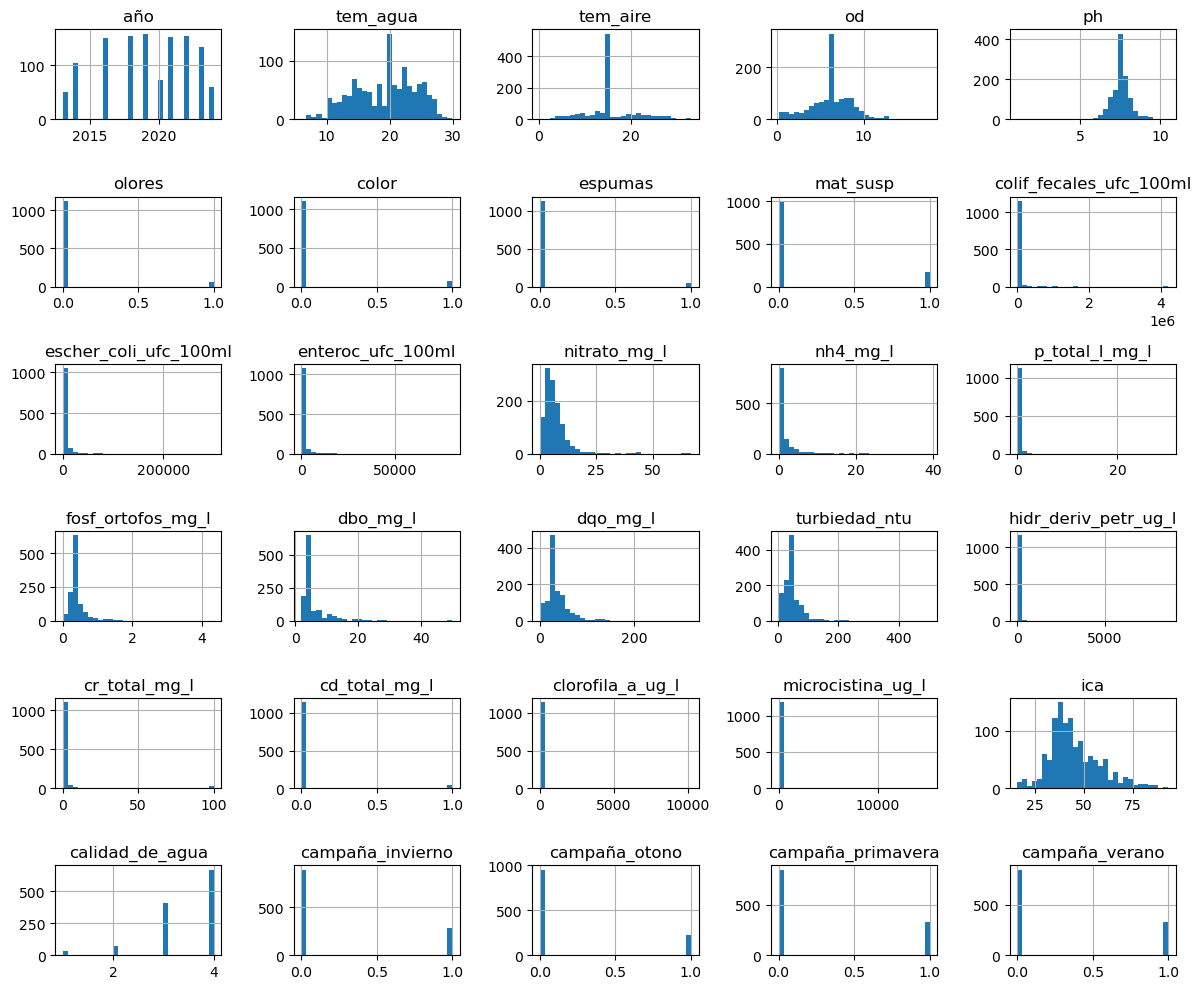

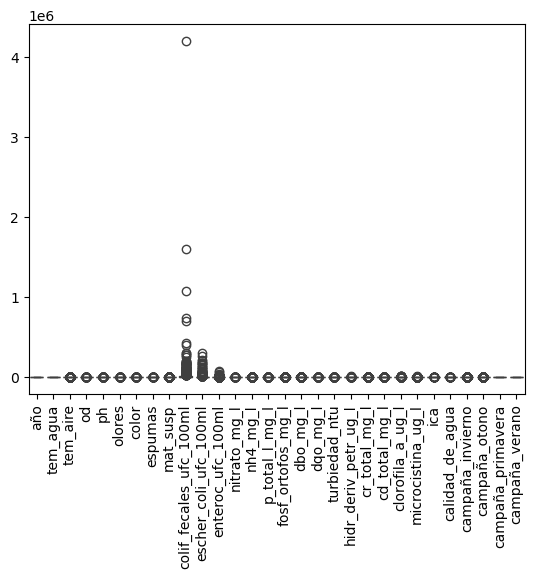

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

#Realizamos varios Histogramas entres las variables
df_final.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

#Boxplot para detectar outliers en las variables
sns.boxplot(data=df_final.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.show()

En el gráfico de boxplot se observa la presencia de valores extremadamente altos, considerados outliers que afectan negativamente tanto la visualización como el análisis de los datos. Para mitigar su impacto sin eliminar registros, aplicaremos un tratamiento de reemplazo utilizando el método del rango intercuartílico (IQR).

In [7]:
#Observamos las metricas de las siguientes variables que tienen valores outliers
df_final[['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml']].describe()

,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml
count,1.182000e+03,1182.000000,1182.000000
mean,2.104322e+04,5839.908122,1148.932479
std,1.413372e+05,20849.986647,4124.499353
min,1.000000e+00,1.000000,1.190000
25%,1.000000e+03,300.000000,160.000000
50%,3.050000e+03,900.000000,300.000000
75%,1.000000e+04,3000.000000,557.500000
max,4.200000e+06,300001.000000,80600.000000


Aplicamos el método del rango intercuartílico (IQR)

In [9]:
#Lista de variables con outliers
variables_outliers = ['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml']

#Creamos una copia del DataFrame original para trabajar sin modificar df_final
df_limpio = df_final.copy()

#Aplicamos el reemplazo para cada variable
for var in variables_outliers:
    Q1 = df_limpio[var].quantile(0.25)
    Q3 = df_limpio[var].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    #Reemplazamos valores extremos por los límites
    df_limpio[var] = df_limpio[var].clip(lower=limite_inferior, upper=limite_superior)

#Mostramos las estadísticas después del reemplazo
print(df_limpio[variables_outliers].describe())

       colif_fecales_ufc_100ml  escher_coli_ufc_100ml  enteroc_ufc_100ml
count              1182.000000            1182.000000        1182.000000
mean               6985.774873            2113.342132         419.821861
std                8184.644067            2476.343550         373.459810
min                   1.000000               1.000000           1.190000
25%                1000.000000             300.000000         160.000000
50%                3050.000000             900.000000         300.000000
75%               10000.000000            3000.000000         557.500000
max               23500.000000            7050.000000        1153.750000


Luego de aplicar el método del rango intercuartílico (IQR), reemplazando únicamente los valores extremos, se logró suavizar su impacto y evitar que influyeran de forma desproporcionada en los análisis. Luego, desarrollaremos otras visualizaciones mediante gráficos de tipo pairplot y violin plot para explorar relaciones entre variables y distribuciones por categoría.

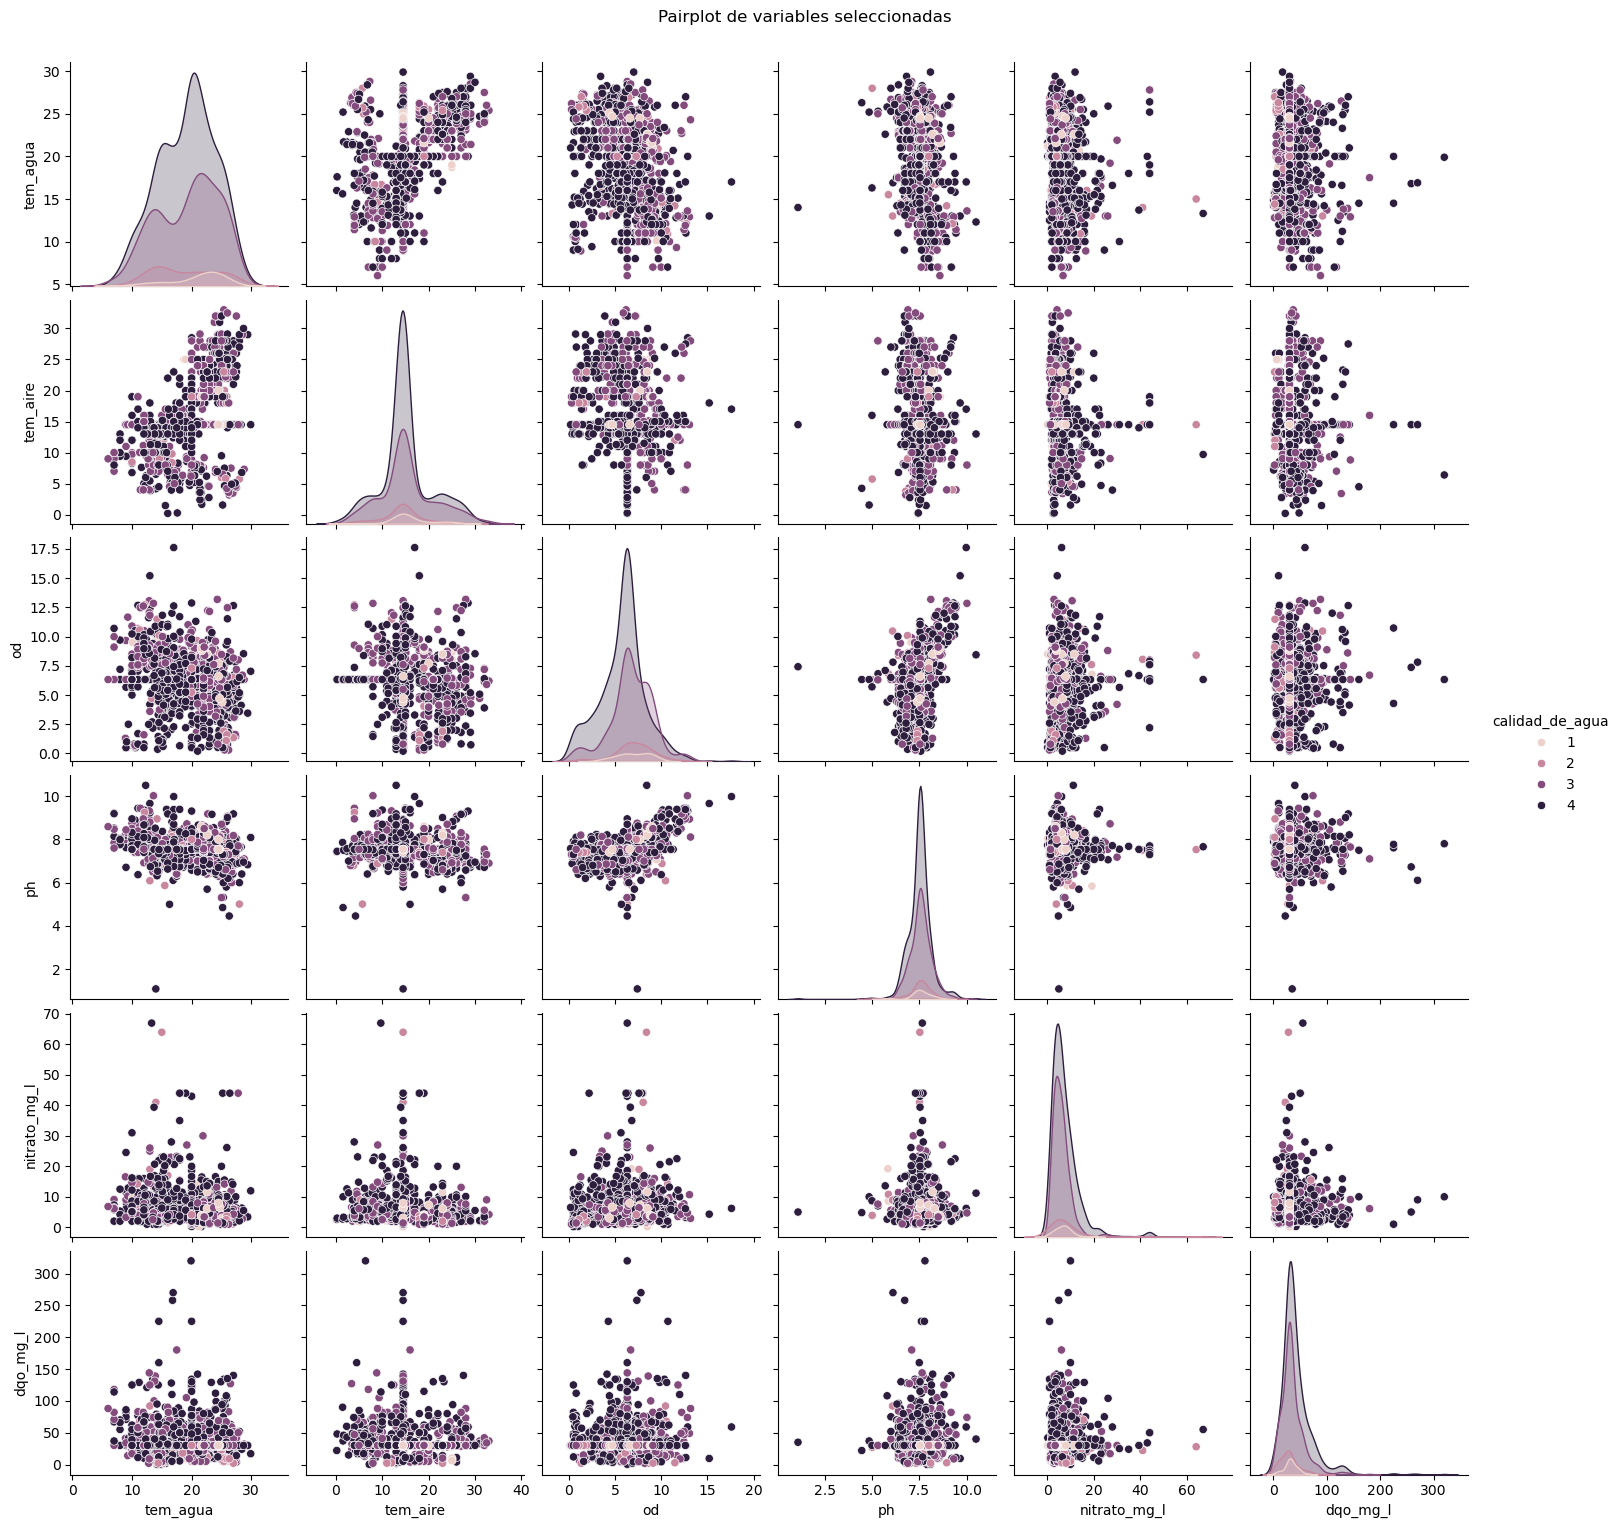

In [15]:
#Seleccionar algunas variables numéricas para el pairplot y generamos la grafica 
variables_seleccionadas = ['tem_agua', 'tem_aire', 'od', 'ph', 'nitrato_mg_l', 'dqo_mg_l']
sns.pairplot(df_limpio[variables_seleccionadas + ['calidad_de_agua']], hue='calidad_de_agua')
plt.suptitle("Pairplot de variables seleccionadas", y=1.02)
plt.show()

Las gráficas de dispersión múltiple (pairplot) nos permite visualizar las relaciones entre las variables numéricas, para este caso se incluyeron la temperatura del agua, temperatura del aire, oxígeno disuelto, pH, nitrato y DQO, en función de la variable objetivo calidad_de_agua. Esta visualización facilita la identificación de patrones de agrupamiento entre clases, así como posibles correlaciones entre variables relevantes para el modelo.

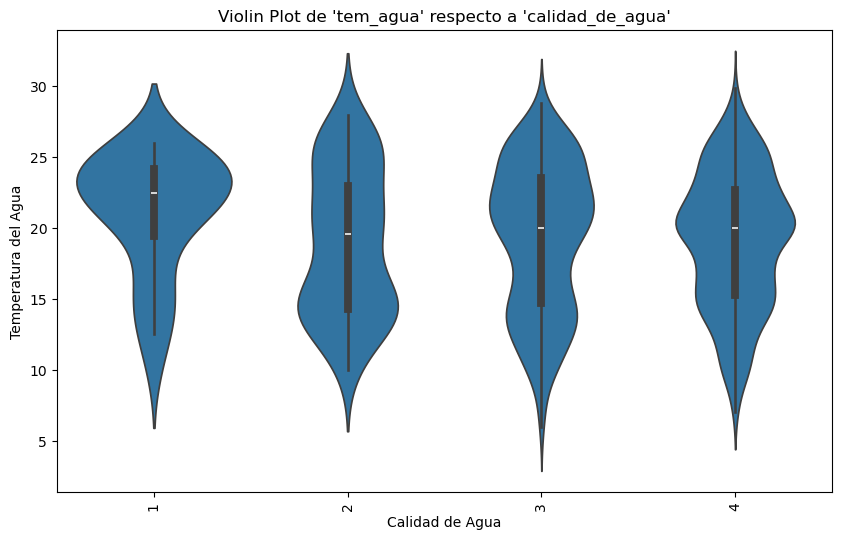

In [21]:
#Generamos el violin plot para la variable 'tem_agua' respecto a 'calidad_de_agua'
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_limpio, x='calidad_de_agua', y='tem_agua')
plt.title("Violin Plot de 'tem_agua' respecto a 'calidad_de_agua'")
plt.xlabel("Calidad de Agua")
plt.ylabel("Temperatura del Agua")
plt.xticks(rotation=90)
plt.show()

El gráfico de violin plot sugiere que la temperatura del agua no varía significativamente entre los distintos niveles de calidad. Por lo tanto, no se observan indicios claros de que esta variable esté directamente relacionada con el nivel de contaminación, al menos dentro de este conjunto de datos.

A continuación, vamos a analiza la matriz de correlación con el objetivo de identificar relaciones entre variables. Este paso nos ayuda a detectar correlaciones lineales que puedan ser útiles tanto en el análisis exploratorio como en la construcción del modelo predictivo.

In [25]:
#Calculamos y mostramos la matriz de correlación numérica
correlaciones = df_limpio.corr(numeric_only=True)
correlaciones

,año,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,...,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua,campaña_invierno,campaña_otono,campaña_primavera,campaña_verano
año,1.000000,0.090345,0.272626,0.043395,-0.033773,0.137565,0.152983,0.057589,0.257596,0.061082,...,0.104036,0.229168,0.015684,-0.012514,-0.009851,0.102918,-0.159144,0.098020,0.006413,0.059210
tem_agua,0.090345,1.000000,0.396691,-0.240283,-0.235253,-0.055976,0.011008,-0.073312,-0.003620,-0.065132,...,-0.124670,-0.044431,-0.037345,0.004222,0.018192,-0.039018,-0.589821,-0.290612,0.297088,0.520656
tem_aire,0.272626,0.396691,1.000000,-0.139206,-0.133988,0.055280,0.076261,-0.033649,0.138371,-0.125287,...,-0.035874,0.013906,-0.026375,-0.008567,-0.006263,-0.016724,-0.236965,-0.179649,0.092072,0.291821
od,0.043395,-0.240283,-0.139206,1.000000,0.401642,-0.082930,-0.147401,0.000712,-0.096985,-0.109079,...,0.085440,0.016948,0.055393,0.016958,0.272766,-0.192161,0.045419,0.103833,-0.007640,-0.126988
ph,-0.033773,-0.235253,-0.133988,0.401642,1.000000,-0.059503,-0.071615,-0.032394,-0.129935,-0.066258,...,0.050234,0.017109,0.078399,0.011242,0.079054,-0.040454,0.043804,0.076915,0.000988,-0.110421
olores,0.137565,-0.055976,0.055280,-0.082930,-0.059503,1.000000,0.452238,0.378238,0.289150,0.177767,...,0.042288,-0.044828,-0.015593,-0.006899,-0.164187,0.102199,0.055194,-0.027267,-0.044479,0.015880
color,0.152983,0.011008,0.076261,-0.147401,-0.071615,0.452238,1.000000,0.323943,0.360489,0.104324,...,0.008591,-0.048768,-0.026119,-0.007655,-0.093906,0.051715,-0.053476,-0.008496,-0.002712,0.061207
espumas,0.057589,-0.073312,-0.033649,0.000712,-0.032394,0.378238,0.323943,1.000000,0.214952,0.118725,...,-0.030866,-0.016043,-0.023200,-0.005937,-0.095552,0.049529,0.023443,0.007597,-0.033923,0.004938
mat_susp,0.257596,-0.003620,0.138371,-0.096985,-0.129935,0.289150,0.360489,0.214952,1.000000,0.106954,...,-0.029149,-0.028473,-0.045140,-0.012399,-0.141058,0.116813,-0.037325,-0.066734,0.017246,0.077019
colif_fecales_ufc_100ml,0.061082,-0.065132,-0.125287,-0.109079,-0.066258,0.177767,0.104324,0.118725,0.106954,1.000000,...,0.086324,-0.114247,-0.020266,-0.017920,-0.480691,0.415395,0.051247,0.074941,-0.035575,-0.079156


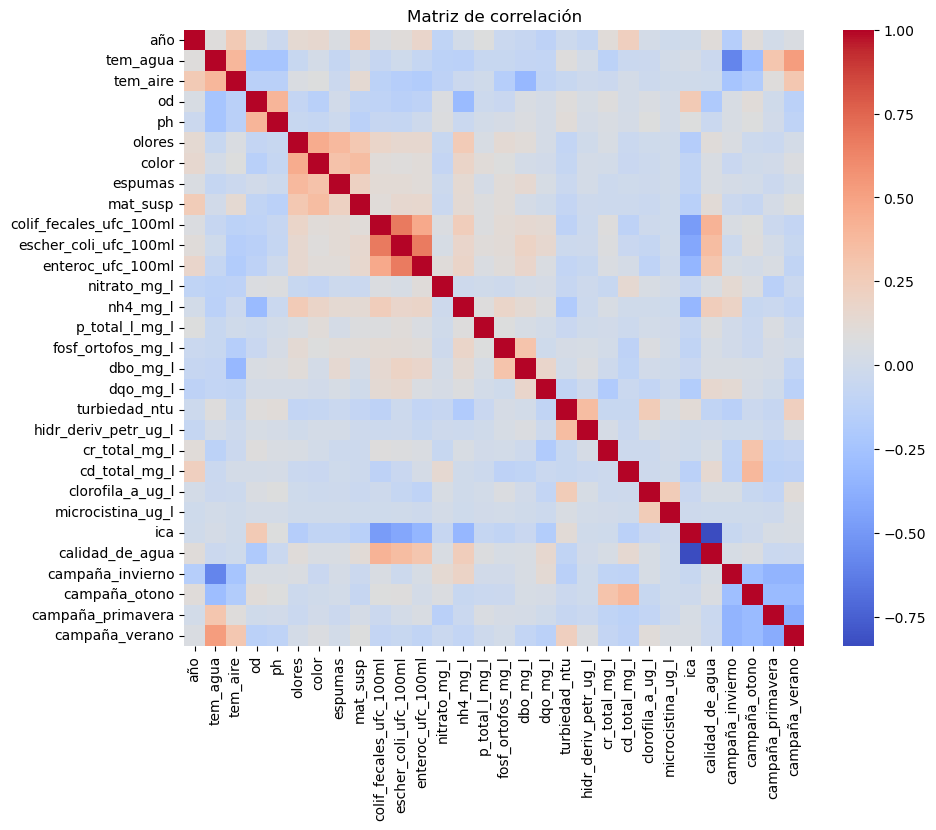

In [27]:
#Visualizar mapa de calor si lo querés ver igual
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=False, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

La gráfica y la tabla de la matriz de correlación revelan diversos patrones entre variables ambientales, microbiológicas y de calidad del agua. Se observa una fuerte correlación positiva entre variables microbiológicas como coliformes fecales, Escherichia coli y enterococos, lo cual es esperable dado que todas son indicadores de contaminación fecal. Tambien, se destacan correlaciones entre nutrientes como nitrato, amonio (NH₄) y fósforo total (pt_total), comúnmente asociados a procesos de eutrofización. Por otro lado, las variables como microcistinas y turbidez presentan correlaciones negativas con indicadores de calidad como el ICA y la variable calidad_de_agua, lo que resulta coherente con el deterioro de las condiciones ambientales.

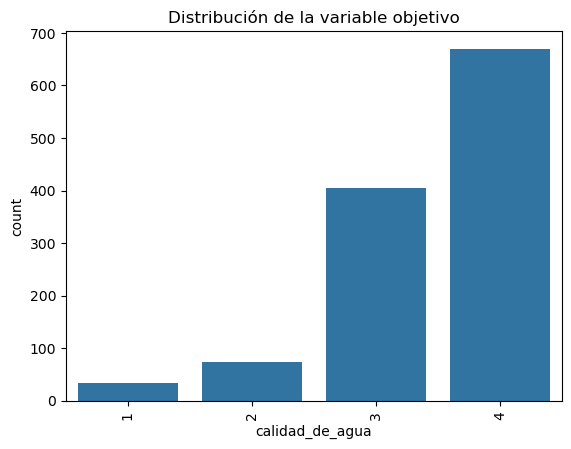

In [29]:
#Obserbamos la distribución de la variable objetivo "calidad_de_agua", 'levemente deteriorada': 0, 'deteriorada': 1, 'muy deteriorada': 2, 
# y 'extremadamente deteriorada': 3
sns.countplot(data=df_limpio, x='calidad_de_agua')
plt.title("Distribución de la variable objetivo")
plt.xticks(rotation=90)
plt.show()

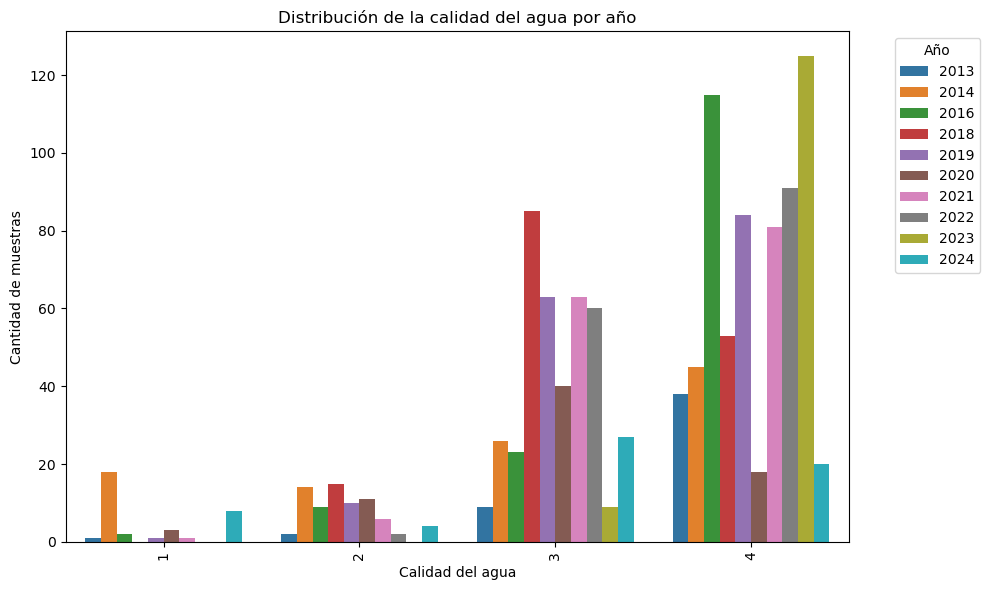

In [31]:
#Observamos la distrubucion de calidad de agua por periodo de años
plt.figure(figsize=(10, 6))
sns.countplot(data=df_limpio, x='calidad_de_agua', hue='año', palette='tab10')
plt.title("Distribución de la calidad del agua por año")
plt.xlabel("Calidad del agua")
plt.ylabel("Cantidad de muestras")
plt.xticks(rotation=90)
plt.legend(title="Año", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Al analizar las gráficas de distribución, se observa que la calidad del agua en los registros disponibles es en general de clase extremadamente deteriorada (clase 4). Tambien el comportamiento de la variable objetivo revela un fuerte desbalance en el dataset, con una predominancia de la clase 4 (extremadamente deteriorada). Este desbalance puede afectar negativamente el rendimiento de los modelos de clasificación, ya que tienden a favorecer las clases mayoritarias, reduciendo la capacidad del modelo para identificar correctamente las clases menos representadas.

## Modelado y entrenamiento de los datos

Aplicaremos la técnica de balanceo de clases SMOTE (Synthetic Minority Over-sampling Technique), una de las más utilizadas, con el objetivo de evitar sesgos en la predicción. Este procedimiento se aplicará exclusivamente sobre los datos de entrenamiento, para no alterar la distribución real del conjunto de prueba.

In [33]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#Separamos X e y del dataset original (no resampleado)
X = df_limpio.drop(columns=['calidad_de_agua'])
y = df_limpio['calidad_de_agua']

#Dividimos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#Aplicamos SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Se aplicó la técnica de Análisis de Componentes Principales (PCA) con el objetivo de reducir la dimensionalidad del conjunto de datos. Esta técnica nos permite disminuir el número de variables manteniendo la mayor parte de la información (varianza), lo que facilita el análisis, mejora la eficiencia computacional y puede optimizar el rendimiento de los modelos de aprendizaje automático.

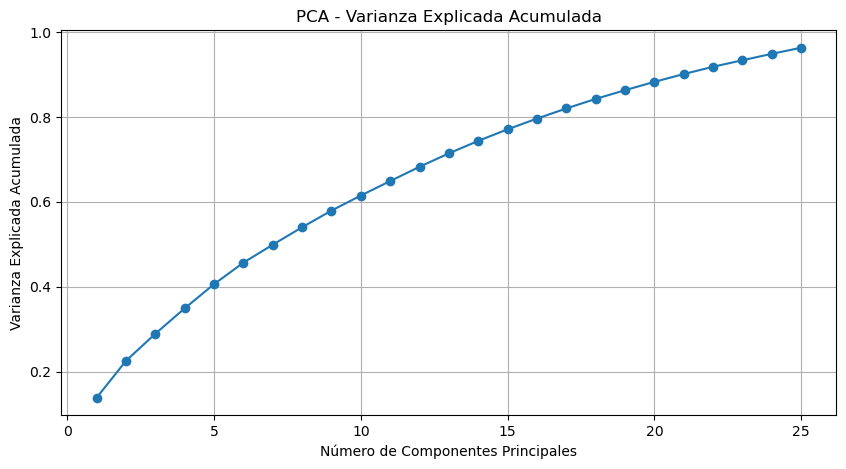

X_train_pca: (2144, 25)
X_test_pca: (237, 25)
y_train_resampled: (2144,)
y_test: (237,)


In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Estandarizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # ¡solo transform!

#Aplicamos PCA con 95% de varianza explicada
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#Verificamos cuánta varianza explican los componentes
explained_variance = pca.explained_variance_ratio_

#Graficamos la varianza explicada acumulada
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('PCA - Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

#Mostramos las dimensiones finales de los conjuntos
print(f"X_train_pca: {X_train_pca.shape}")
print(f"X_test_pca: {X_test_pca.shape}")
print(f"y_train_resampled: {y_train_resampled.shape}")
print(f"y_test: {y_test.shape}")

En la gráfica de varianza explicada acumulada se observa que el “codo” de la curva se encuentra aproximadamente en el componente número 25. A partir de ese punto, la curva no aportaría una ganancia significativa de información.

### Entrenamiento de modelos de clasificación Random Forest, KNN y Redes Neuronales

#### Aplicamos el modelo Random Forest

In [37]:
#Aplicamos Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Creamos y entrenamos el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train_resampled)

#Realizamos predicciones
y_pred = rf_model.predict(X_test_pca)

#Resultado del modelo
print("Accuracy del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))

Accuracy del modelo: 0.8354430379746836

Reporte de clasificación:
               precision    recall  f1-score   support

           1       0.80      0.57      0.67         7
           2       0.58      0.47      0.52        15
           3       0.76      0.84      0.80        81
           4       0.91      0.89      0.90       134

    accuracy                           0.84       237
   macro avg       0.76      0.69      0.72       237
weighted avg       0.84      0.84      0.83       237


Matriz de confusión:
 [[  4   2   1   0]
 [  1   7   5   2]
 [  0   3  68  10]
 [  0   0  15 119]]


Vamos a observar la curva de aprendizaje del modelo con el fin de identificar si presenta indicios de sobreajuste (overfitting), subajuste (underfitting) o si su desempeño es óptimo en términos de generalización.

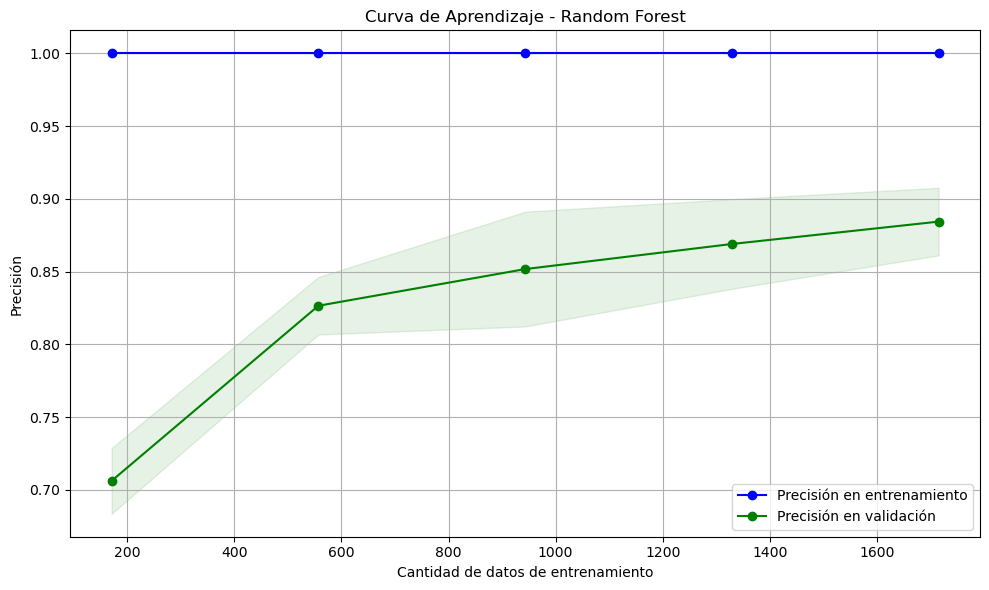

In [39]:
#Vamos a evaluar la curva de aprendizaje
from sklearn.model_selection import learning_curve
import numpy as np

#Generamos la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    rf_model,
    X_train_pca,
    y_train_resampled,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
    shuffle=True,
    random_state=42
)

#Calculamos la media y desviación estándar
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#Graficamos la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Precisión en entrenamiento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Precisión en validación')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='green')

plt.title('Curva de Aprendizaje - Random Forest')
plt.xlabel('Cantidad de datos de entrenamiento')
plt.ylabel('Precisión')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

Observando la curva de aprendizaje y los resultados obtenidos del modelo Random Forest, podriamos concluir que el modelo presenta indicios de sobreajuste. En la gráfica podemos observar una precisión del 100% en el conjunto de entrenamiento y una precisión menor en validación, aunque con tendencia ascendente, lo que indica que el modelo memoriza bien los datos de entrenamiento pero tiene dificultades para generalizar.
Este comportamiento también lo podemos ver las métricas de evaluación, el modelo alcanza un accuracy del 83.54%, lo cual es bueno a nivel general, pero si analizamos el reporte de clasificación, lo que se puede verun desempeño desigual entre las clases. Ejemplo, las clases 1 y 2 tienen valores de recall bajos (0.57 y 0.47) lo que indica que el modelo tiene dificultades para identificar correctamente estas clases. La clase 4 presenta un rendimiento muy alto, con un f1-score de 0.90, lo que puede sugerir que el modelo está sesgado hacia las clases mayoritarias, como también se evidencia la matriz de confusión, donde las clases menos representadas tienen más errores. Entonce el modelo Random Forest tiene una buena precisión general, no está equilibrado en su rendimiento entre clases y podría mejorarse ajustando hiperparámetros.

#### Aplicamos el modelo K-Vecinos más cercanos 

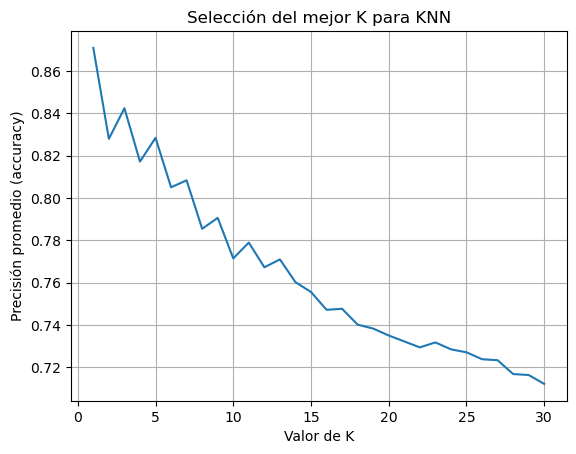

Mejor valor de k: 1


In [41]:
#Vamos a seleccionar que configuración de K-vecino necesitamos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#Rango de valores de k a probar
k_range = range(1, 31)
k_scores = []

#Evaluamos cada valor de k usando validación cruzada
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_pca, y_train_resampled, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

#Graficamos los resultados
plt.plot(k_range, k_scores)
plt.xlabel('Valor de K')
plt.ylabel('Precisión promedio (accuracy)')
plt.title('Selección del mejor K para KNN')
plt.grid(True)
plt.show()

#Mejor valor de k
best_k = k_range[k_scores.index(max(k_scores))]
print("Mejor valor de k:", best_k)


La gráfica podemos observar como varía la precisión promedio accuracy del modelo KNN a medida que se prueba con diferentes valores de k (de 1 a 30). Por lo que podemos decir que tiene un tendencia desendiente a medida que aumenta K, lo que el punto K=1 es valor de mejor rendimiento promedio en los datos de entrenamiento.

In [43]:
#Aplicamos K-Vecinos más cercanos con k=1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Creamos el modelo KNN con k=1
knn_model = KNeighborsClassifier(n_neighbors=1)

#Entrenamos el modelo con los datos procesados
knn_model.fit(X_train_pca, y_train_resampled)

#Realizamos predicciones sobre el conjunto de prueba procesado
y_pred_knn = knn_model.predict(X_test_pca)

#Resultado del modelo
print("Accuracy del modelo KNN:", accuracy_score(y_test, y_pred_knn))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_knn))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_knn))

Accuracy del modelo KNN: 0.7679324894514767

Reporte de clasificación:
               precision    recall  f1-score   support

           1       0.86      0.86      0.86         7
           2       0.35      0.47      0.40        15
           3       0.70      0.75      0.73        81
           4       0.88      0.81      0.84       134

    accuracy                           0.77       237
   macro avg       0.70      0.72      0.71       237
weighted avg       0.78      0.77      0.77       237


Matriz de confusión:
 [[  6   1   0   0]
 [  1   7   6   1]
 [  0   6  61  14]
 [  0   6  20 108]]


Vamos a observar la curva de aprendizaje del modelo con el fin de identificar si presenta indicios de sobreajuste (overfitting), subajuste (underfitting) o si su desempeño es óptimo en términos de generalización.

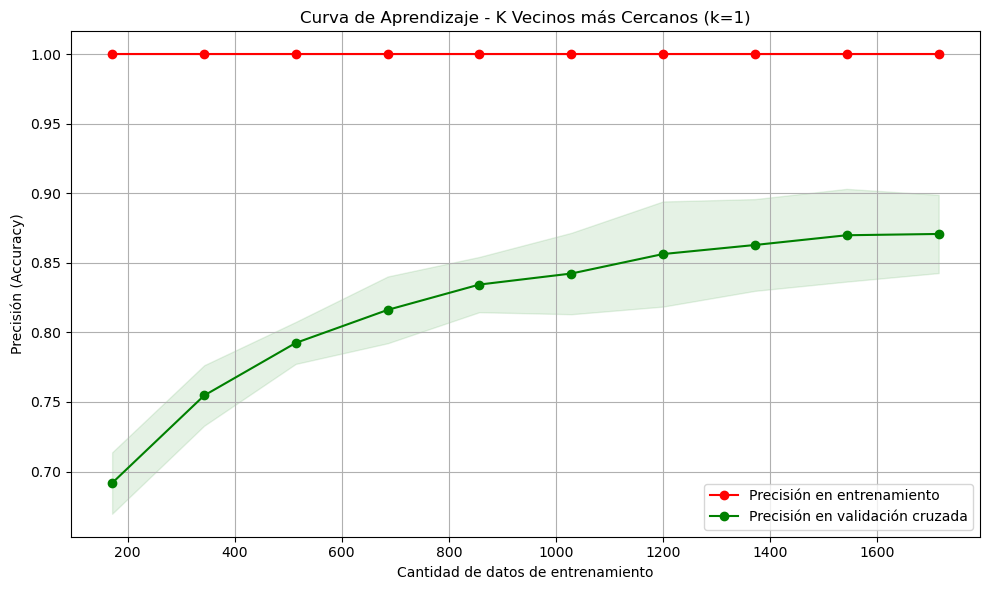

In [45]:
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier

#Generamos la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    knn_model, X_train_pca, y_train_resampled, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
)

#Calculamos medias y desviaciones estándar
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#Graficamos la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje - K Vecinos más Cercanos (k=1)")
plt.xlabel("Cantidad de datos de entrenamiento")
plt.ylabel("Precisión (Accuracy)")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Precisión en entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Precisión en validación cruzada")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

Al aplicar el modelo de K-Vecinos más cercanos con k = 1, se obtuvo una precisión general del 76.79%, lo que representa un rendimiento sólido considerando la distribución de clases. Esta configuración permitió mejorar el desempeño del modelo, especialmente en clases minoritarias.
Por ejemplo, la clase 1 dio resultado F1-score de 0.86, mientras que la clase 4 también mostró un desempeño robusto con un F1-score de 0.84. Aunque la clase 2 continúa siendo la más baja, su recall mejoró a 0.47, lo que indica que el modelo está identificando un mayor número de casos verdaderos positivos en esa categoría. En la matriz de confusión refleja una disminución en los errores de clasificación para las clases con menos representación, lo que evidencia una mejora en la capacidad de generalización del modelo.Tambien en las métricas de evaluación muestran que el modelo con k = 1 mantiene un buen equilibrio entre precisión y recall. Podemos observar diferencias en el rendimiento entre clases, lo que sugiere la posibilidad de implementar técnicas de ajuste de hiperparámetros para seguir optimizando los resultados.

#### Aplicamos el modelo Redes Neuronales MLP

In [47]:
#Aplicamos el modelo Redes Neuronales MLP
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Definimos el modelo
mlp_model = MLPClassifier(hidden_layer_sizes=(100,),   
                          activation='relu',
                          solver='adam',
                          max_iter=1000,                
                          random_state=42)

#Entrenamos el modelo con los datos ya procesados
mlp_model.fit(X_train_pca, y_train_resampled)

#Realizamos predicciones
y_pred_mlp = mlp_model.predict(X_test_pca)

#Resultado del modelo
print("Accuracy del modelo MLP:", accuracy_score(y_test, y_pred_mlp))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_mlp))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_mlp))

Accuracy del modelo MLP: 0.8227848101265823

Reporte de clasificación:
               precision    recall  f1-score   support

           1       0.44      0.57      0.50         7
           2       0.44      0.53      0.48        15
           3       0.82      0.79      0.81        81
           4       0.90      0.89      0.89       134

    accuracy                           0.82       237
   macro avg       0.65      0.70      0.67       237
weighted avg       0.83      0.82      0.83       237


Matriz de confusión:
 [[  4   2   1   0]
 [  1   8   5   1]
 [  2   3  64  12]
 [  2   5   8 119]]


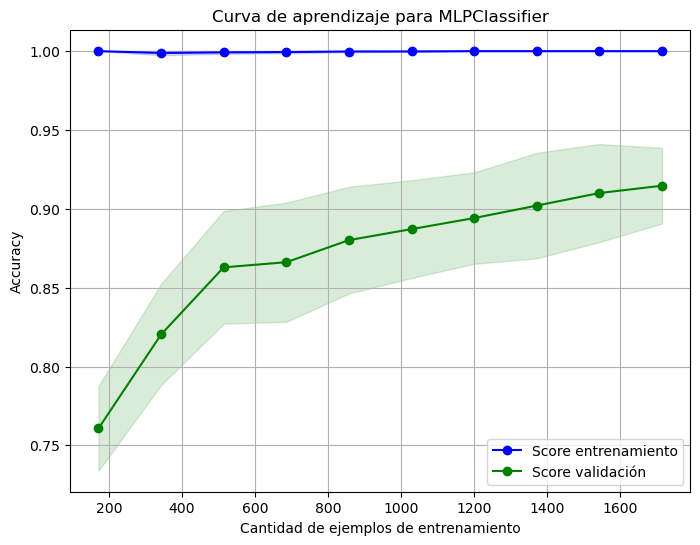

In [49]:
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier

#Calculamos la curva de aprendizaje
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=mlp_model,
    X=X_train_pca,
    y=y_train_resampled,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

#Calculamos promedio y desviación estándar para entrenamiento y validación
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

#Graficamos la curva de aprendizaje
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Score entrenamiento')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, valid_mean, 'o-', color='green', label='Score validación')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.15, color='green')

plt.title('Curva de aprendizaje para MLPClassifier')
plt.xlabel('Cantidad de ejemplos de entrenamiento')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

El modelo de red neuronal alcanzó una precisión general accuracy del 82.27%, mostrando una mejora respecto a modelos anteriores como KNN. La curva de aprendizaje evidencia una diferencia entre el rendimiento en entrenamiento score cercano al 1.0 y validación score creciendo hasta aproximadamente 0.91, lo que indica una ligera tendencia al overfitting, aunque el modelo sigue generalizando bien. En el reporte de clasificación, se observa un alto desempeño en las clases mayoritarias, la clase 4 obtuvo un F1-score de 0.89 y la clase 3 un 0.81, confirmando que el modelo aprende correctamente donde hay mayor cantidad de ejemplos. Para las clases 1 y 2, tuvieron F1-scores de 0.50 y 0.48, ambas mejoraron su recall comparado con otros modelos, lo cual refleja un avance en la capacidad del modelo para reconocer estas clases minoritarias. La matriz de confusión revela que la mayoría de los errores ocurren entre clases 3 y la clase 4. El modelo MLP muestra un rendimiento sólido y balanceado, aunque aúnse podria mejora en clases minoritarias, las cuales podrían abordarse con técnicas hiperparámetros para reducir el sobreajuste y mejorar la generalización.

## Conclusión de aplicacion de los modelos.

Entre los tres modelos evaluados, Red neuronal mostró el equilibrio entre precisión general y reconocimiento de clases minoritarias, aunque con ligera tendencia al sobreajuste. K-Vecinos con k = 1 mejoró notablemente en clases poco representadas, pero con menor precisión general y Random Forest logró alta precisión en entrenamiento, pero presentó sobreajuste y un rendimiento desigual entre clases.
Para Terminar de saber cual modelo tiene mejor rendimiento, vamos aplicar tecnicas de hiperparámetros, con GridSearchCV que sirven para realizar prueba con todas las combinaciones posibles de hiperparámetros.

In [51]:
#Tecnicas de hiperparámetros para Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_pca, y_train_resampled)

print("Mejores parámetros:", grid_rf.best_params_)
print("Mejor Accuracy:", grid_rf.best_score_)

Mejores parámetros: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor Accuracy: 0.8820207829553623


La búsqueda de hiperparámetros encontró que la mejor configuración para el modelo Random Forest es usar un bosque con 200 árboles, limitar la profundidad de cada árbol a 20 niveles, permitir divisiones mínimas con 2 muestras y hojas con 1 muestra y ajustar automáticamente el peso de las clases para balancearlas. Con esta configuración, el modelo logra un accuracy del 88.20% en promedio durante la validación cruzada, lo que sugiere un buen desempeño general. Esto significa que el modelo está bien ajustado para evitar tanto el sobreajuste, el subajuste y también está manejando bien el posible desbalance de clases.

In [53]:
# Técnicas de hiperparámetros para K-Vecinos
from sklearn.neighbors import KNeighborsClassifier
import joblib

#Definimos el grid de parámetros
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

#Ajustamos modelo con búsqueda en grilla y validación cruzada
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train_pca, y_train_resampled)

#Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_knn.best_params_)
print("Mejor Accuracy:", grid_knn.best_score_)

Mejores parámetros: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Mejor Accuracy: 0.8572903731782237


Luego de realizar la busquedad de hiperparámetros se encontró que la configuración óptima para nuestro conjunto de datos es utilizar 3 vecinos, con la métrica de distancia Euclidiana (p=2) y ponderación de los vecinos basada en la distancia (weights='distance'). Este conjunto de parámetros alcanzó una precisión promedio en validación cruzada del 85.72%, lo que indica un buen desempeño del modelo para la tarea de clasificación. La elección de pesos por distancia sugiere que dar mayor importancia a vecinos más cercanos mejora la capacidad predictiva y el bajo número de vecinos evita un exceso que podría disminuir la precisión.

In [55]:
#Técnicas de hiperparámetros para Redes Neuronales
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

grid_mlp = GridSearchCV(
    MLPClassifier(max_iter=500, random_state=42),
    param_grid_mlp,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_mlp.fit(X_train_pca, y_train_resampled)

print("Mejores parámetros:", grid_mlp.best_params_)
print("Mejor Accuracy:", grid_mlp.best_score_)

Mejores parámetros: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001}
Mejor Accuracy: 0.9258577870727404


Luego de aplicar técnicas de ajuste de hiperparámetros al modelo de redes neuronales, se identificó que mejoro logrando una precisión promedio del 92.6% en validación cruzada, siendo el modelo con mejor rendimiento entre los evaluados. Este resultado destaca a la red neuronal como una alternativa para la clasificación del este proyecto para clasificar la calidad de agua.

#### Aplicamos La técnica con regularización y early stopping

Le aplicamos a los dos que estan mas alto. Red Neuronal y Random Forest.

Accuracy del modelo Random Forest: 0.7974683544303798

Reporte de clasificación:
               precision    recall  f1-score   support

           1       0.80      0.57      0.67         7
           2       0.55      0.40      0.46        15
           3       0.69      0.84      0.76        81
           4       0.90      0.83      0.86       134

    accuracy                           0.80       237
   macro avg       0.74      0.66      0.69       237
weighted avg       0.81      0.80      0.80       237


Matriz de confusión:
 [[  4   2   1   0]
 [  1   6   6   2]
 [  0   3  68  10]
 [  0   0  23 111]]


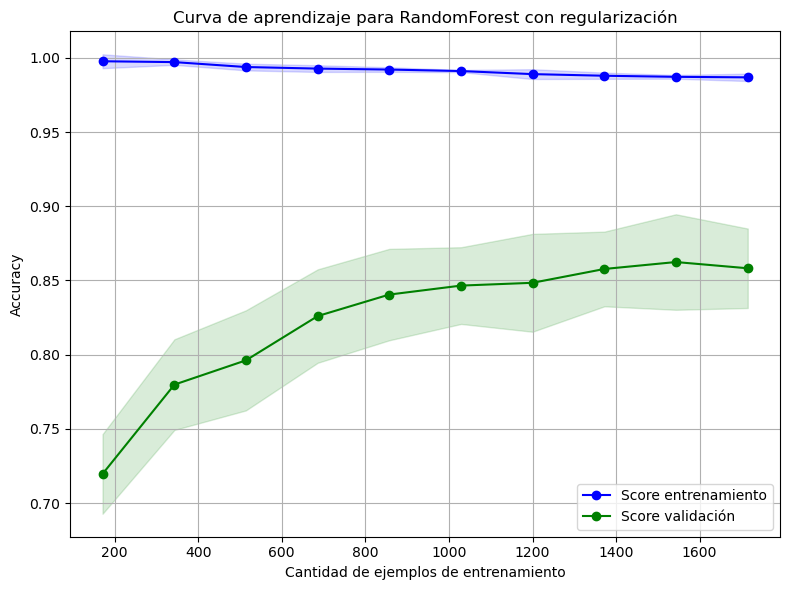

In [67]:
#Aplicamos Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Definimos el modelo con hiperparámetros que actúan como regularización
rf_model = RandomForestClassifier(
    n_estimators=100,        # cantidad de árboles
    max_depth=10,            # limita la profundidad (evita sobreajuste)
    min_samples_split=5,     # mínimo de muestras para dividir
    min_samples_leaf=2,      # mínimo de muestras por hoja
    class_weight='balanced', # ajusta clases si están desbalanceadas
    random_state=42
)

# Entrenamiento del modelo
rf_model.fit(X_train_pca, y_train_resampled)

# Predicciones
y_pred_rf = rf_model.predict(X_test_pca)

# Resultados obtenidos
print("Accuracy del modelo Random Forest:", accuracy_score(y_test, y_pred_rf))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_rf))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))

# Curva de aprendizaje
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=rf_model,
    X=X_train_pca,
    y=y_train_resampled,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Score entrenamiento')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, valid_mean, 'o-', color='green', label='Score validación')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.15, color='green')
plt.title('Curva de aprendizaje para RandomForest con regularización')
plt.xlabel('Cantidad de ejemplos de entrenamiento')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy del modelo MLP: 0.8312236286919831

Reporte de clasificación:
               precision    recall  f1-score   support

           1       0.40      0.57      0.47         7
           2       0.60      0.60      0.60        15
           3       0.77      0.86      0.81        81
           4       0.94      0.85      0.89       134

    accuracy                           0.83       237
   macro avg       0.68      0.72      0.69       237
weighted avg       0.85      0.83      0.84       237


Matriz de confusión:
 [[  4   2   1   0]
 [  4   9   2   0]
 [  2   2  70   7]
 [  0   2  18 114]]


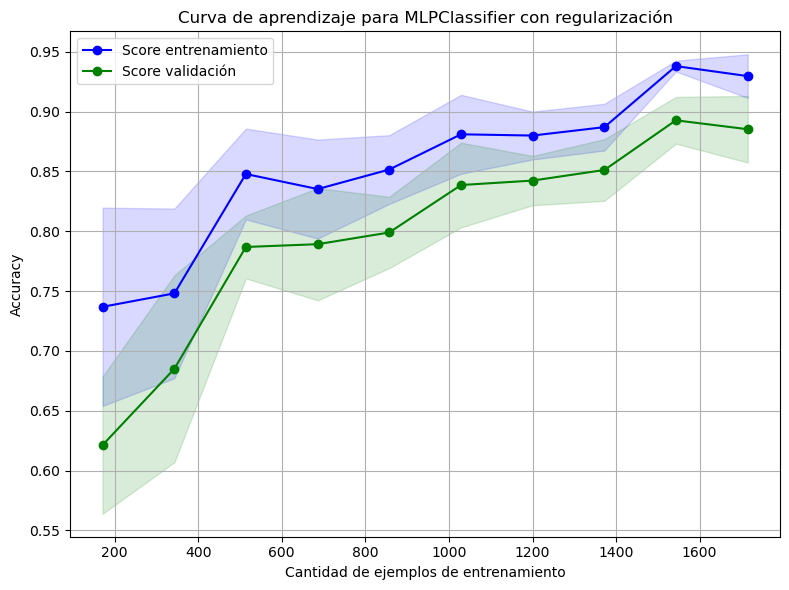

In [69]:
#Aplicamos a Red Neuronal
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='tanh',
    alpha=0.01,
    learning_rate_init=0.001,
    early_stopping=True,
    validation_fraction=0.1,
    max_iter=1000,
    random_state=42
)

#Entrenamiento del modelo
mlp_model.fit(X_train_pca, y_train_resampled)

#Predicciones
y_pred_mlp = mlp_model.predict(X_test_pca)

#Resultado obtenidos
print("Accuracy del modelo MLP:", accuracy_score(y_test, y_pred_mlp))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_mlp))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_mlp))

#Curva de aprendizaje
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=mlp_model,
    X=X_train_pca,
    y=y_train_resampled,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Score entrenamiento')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, valid_mean, 'o-', color='green', label='Score validación')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.15, color='green')
plt.title('Curva de aprendizaje para MLPClassifier con regularización')
plt.xlabel('Cantidad de ejemplos de entrenamiento')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

Concluimos: Luego de observar y comparar resultados de los tres modelos de clasificación (Random Forest, KNN y Red Neuronal MLP), tanto en su inicio de entrenamiento y con con búsqueda de hiperparámetros, regularización y early stopping podriamos decir que la Red Neuronal es el modelo con mejor rendimiento general, alcanzando un accuracy del 83,12%, el modelo logró un buen equilibrio entre precisión y recall, especialmente en las clases mayoritarias. Presenta una curba de aprendizaje obtimos a diferencia de Random Forest que esta sobreajustado.

### Cierre de Proyecto - Conclusión

En este proyecto se desarrolló un modelo de clasificación para predecir la calidad del agua en el Río de la Plata. A lo largo del proceso se aplicaron, proceso ETL, técnicas de análisis exploratorio, preprocesamiento de datos, tratamiento de valores atípicos, balanceo de clases mediante SMOTE y reducción de dimensionalidad con PCA, lo que permitió preparar un conjunto de datos más robusto.

Se entrenaron y compararon tres algoritmos de clasificación como Random Forest, K-Nearest Neighbors (KNN) y Red Neuronal Multicapa (MLP). Cada uno fue evaluado en términos de precisión, recall, f1-score y comportamiento frente a clases desbalanceadas. Luego se aplicaron técnicas de optimización de hiperparámetros con GridSearchCV para mejorar el rendimiento de cada modelo.

Se optimizo los modelos con regularización y early stopping, demostrando mejorias generales. Se decidio considerar al modelo Red Neuronal como el que mejor predice porque al en la tecnia de hiperparametros alcanzó un accuracy del 92.58% en validación cruzada, lo que refleja su capacidad para aprender patrones y un accuracy final sobre el conjunto de prueba fue de 83.12%, ya que refleja una evaluación más realista del modelo en datos no vistos. También el modelo mostró un desempeño equilibrado entre las clases, mejorando la identificación de clases minoritarias, que fueron las más difíciles de predecir con otros algoritmos aplicados.

En Las curvas de aprendizaje el modelo red neuronal evidenció una buena capacidad de generalización, con rendimiento controlado en el entrenamiento y validación, lo que significa que esta obtimizado.

Podemos concluir, el modelo Red Neuronal es el mas optimo para predecir la clasificacion de calidad del agua. Este proyecto ahora puede ser usadod para predecir calidad de agua de otras regiones como Tierra del Fuego.
Finalizamos este notebook, lo almacenando para no tener que entrenarlo y tenerlo listo para usarse cuando lo necesitemos

In [71]:
import joblib

#Obtener el directorio actual (notebooks/)
directorio_actual = os.getcwd()

#Subimos un nivel y entrar a la carpeta src/
ruta_guardado = os.path.join(directorio_actual, '..', 'src', 'modelo_calidad_agua.pkl')

#Normalizar la ruta
ruta_guardado = os.path.abspath(ruta_guardado)

#Guardamos el modelo
joblib.dump(mlp_model, ruta_guardado)

print("Modelo guardado exitosamente en:", ruta_guardado)

Modelo guardado exitosamente en: C:\Users\destrada\Ciencia_datos_2A1C\Cookiecutter_Proyecto_Final\src\modelo_calidad_agua.pkl
